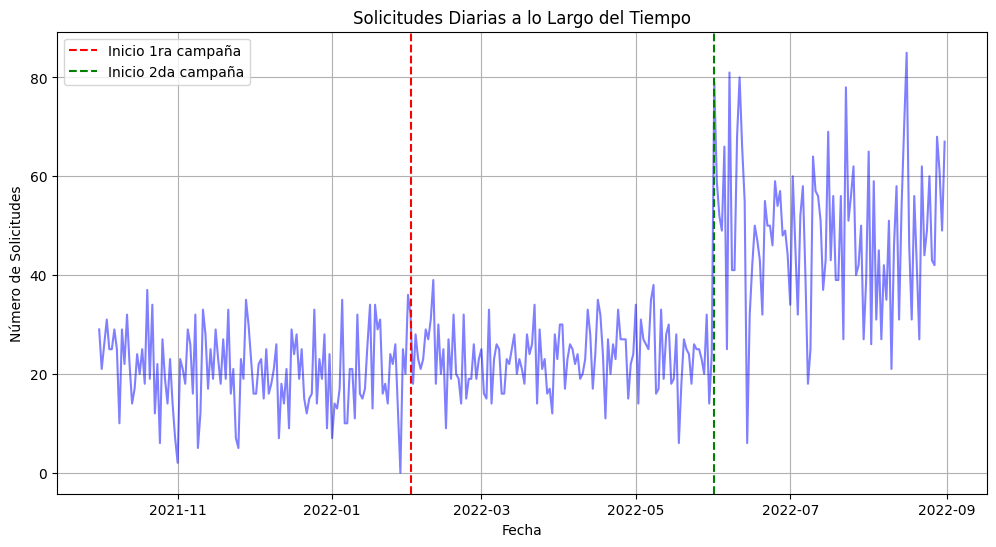

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Cargar y preparar datos
df = pd.read_csv('SolicitudesDiarias.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Dividir en períodos
periodo1 = df[df['Fecha'] < '2022-02-01']
periodo2 = df[(df['Fecha'] >= '2022-02-01') & (df['Fecha'] < '2022-06-01')]
periodo3 = df[df['Fecha'] >= '2022-06-01']

# Calcular estadísticas descriptivas
stats_periodos = {
    'Antes de campañas (Oct 2021 - Ene 2022)': periodo1['Solicitudes'].describe(),
    'Primera campaña (Feb 2022 - May 2022)': periodo2['Solicitudes'].describe(),
    'Segunda campaña (Jun 2022 - Ago 2022)': periodo3['Solicitudes'].describe()
}

# Calcular intervalos de confianza al 95%
def calcular_ic(data, confidence=0.95):
    return stats.t.interval(
        confidence=confidence,
        df=len(data)-1,
        loc=np.mean(data),
        scale=stats.sem(data)
    )

ic_periodo1 = calcular_ic(periodo1['Solicitudes'])
ic_periodo2 = calcular_ic(periodo2['Solicitudes'])
ic_periodo3 = calcular_ic(periodo3['Solicitudes'])

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha'], df['Solicitudes'], 'b-', alpha=0.5)
plt.axvline(x=pd.to_datetime('2022-02-01'), color='r', linestyle='--', label='Inicio 1ra campaña')
plt.axvline(x=pd.to_datetime('2022-06-01'), color='g', linestyle='--', label='Inicio 2da campaña')
plt.title('Solicitudes Diarias a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Solicitudes')
plt.legend()
plt.grid(True)
plt.show()


In [13]:

# Imprimir resultados
print("\nEstadísticas descriptivas por período:")
for periodo, stats in stats_periodos.items():
    print(f"\n{periodo}:")
    print(stats)



Estadísticas descriptivas por período:

Antes de campañas (Oct 2021 - Ene 2022):
count    123.000000
mean      20.585366
std        7.979407
min        0.000000
25%       15.000000
50%       21.000000
75%       26.000000
max       37.000000
Name: Solicitudes, dtype: float64

Primera campaña (Feb 2022 - May 2022):
count    120.000000
mean      23.500000
std        6.267161
min        6.000000
25%       19.000000
50%       24.000000
75%       27.250000
max       39.000000
Name: Solicitudes, dtype: float64

Segunda campaña (Jun 2022 - Ago 2022):
count    92.000000
mean     48.543478
std      14.959589
min       6.000000
25%      40.000000
50%      49.000000
75%      58.000000
max      85.000000
Name: Solicitudes, dtype: float64


In [14]:

print("\nIntervalos de confianza al 95%:")
print(f"Antes de campañas: [{ic_periodo1[0]:.2f}, {ic_periodo1[1]:.2f}]")
print(f"Primera campaña: [{ic_periodo2[0]:.2f}, {ic_periodo2[1]:.2f}]")
print(f"Segunda campaña: [{ic_periodo3[0]:.2f}, {ic_periodo3[1]:.2f}]")

# Estadísticas adicionales
print("\nResumen de cambios:")
print(f"Promedio antes de campañas: {periodo1['Solicitudes'].mean():.2f}")
print(f"Promedio durante primera campaña: {periodo2['Solicitudes'].mean():.2f}")
print(f"Promedio durante segunda campaña: {periodo3['Solicitudes'].mean():.2f}")
print(f"\nAumento porcentual primera campaña: {((periodo2['Solicitudes'].mean() / periodo1['Solicitudes'].mean()) - 1) * 100:.1f}%")
print(f"Aumento porcentual segunda campaña vs inicial: {((periodo3['Solicitudes'].mean() / periodo1['Solicitudes'].mean()) - 1) * 100:.1f}%")


Intervalos de confianza al 95%:
Antes de campañas: [19.16, 22.01]
Primera campaña: [22.37, 24.63]
Segunda campaña: [45.45, 51.64]

Resumen de cambios:
Promedio antes de campañas: 20.59
Promedio durante primera campaña: 23.50
Promedio durante segunda campaña: 48.54

Aumento porcentual primera campaña: 14.2%
Aumento porcentual segunda campaña vs inicial: 135.8%
